# Analýza dat v Pythonu

Jedna z oblastí, kde popularita Pythonu neustále roste, je analýza dat. Co tenhle termín znamená?

Máme-li nějaká data – statistické údaje o obyvatelstvu, data z fyzikálního experimentu, log přístupů na webovou službu, apod. – a snažíme se z nich zjistit užitečné informace – jak souvisí příjmy s dostupností škol, jestli platí hypotéza, kde uživatelé webu tápou.

Je možné použít jazyky vyvynuté přímo pro analýzu dat, jako R, které svojí syntaxí a filozofií víc odpovídají datovým úlohám. Python jako obecný programovací jazyk sice místy vyžaduje krkolomější zápis, ale zato nabízí možnost data spojit s jinými oblastmi – od získávání informací z webových stránek po tvoření webových či desktopových rozhraní.


## Proces analýzy dat

Práce datového analytika se většinou drží následujícího postupu:

* Formulace otázky, kterou chceme zodpovědět
* Identifikace dat, které můžeme použít
* Získání dat (stažení, převod do použitelného formátu)
* Uložení dat
* Zkoumání dat
* Publikace výsledků

<small>*(založeno na diagramu z knihy *Data Wrangling in Python* od Jacqueline Kazil &amp; Katharine Jarmul, str. 3)*</small>

S prvními dvěma kroky Python příliš nepomůže. Na druhé dva se dají s úspěchem použít Pythoní standardní knihovnu: `requests`, `json`, `csv`, případně doinstalovat `lxml` pro XML či `xlwt`/`openpyxl` na Excelové soubory.

Na zkoumání dat a přípravu výsledků pak použijeme specializované „datové” knihovny, se kterými se seznámíme v této a následující lekci.
Datoví analytici a vědci tvoří podskupinu Pythoní komunity s vlastními konferencemi (PyData), organizacemi (NumFocus, Continuum Analytics), a knihovnami jako Pandas, Numpy, Scipy a Matplotlib. Potřeby této komunity se ale samozřejmě odrážejí i v Pythonu samotném.


## Nejednoznačnost a zkratky

Data můžeme buď prozkoumávat, hrát si s nimi, zjišťovat zajímavé souvislosti; anebo můžeme připravovat programy, které danou analýzu provedou automaticky (např. vygenerují měsíční zprávu o hospodaření společnosti).
Na obojí se používají podobné nástroje.
Automaticky pouštěné skripty musí být samozřejmě robustní. Nástroje ke zkoumání dat ale bývají přívětivé k analytikovi, často na úkor robustnosti nebo „dobrých programátorských mravů”: např. některé operátory tak trochu „hadají”, co uživatel chtěl, v tutoriálech se setkáte se zkratkami jako `import pandas as pd` či dokonce `from numpy import *`.

Toto je kurz programovací, kde nám záleží více na znovupoužitelném kódu než na jednom konkrétním výsledku. Budeme proto preferovat explicitní a jednoznačné operace (které jsou v použitých knihovnách vždy vedle zkratek k dispozici).


# Jupyter Notebook

Užitečný nástroj, který Pythoním datovým analytikům ulehčuje práci, se jmenuje Jupyter Notebook. Je to webová verze Pythoní konzole, kde můžeme psát příkazy a kontrolovat výstup.

Na rozdíl od klasické konzole se v Notebooku příkazy (a jejich výstup) ukládají, a je tedy jednoduché se k nim vracet, upravovat je, a přidávat komentáře. Mezi příkazy se pak dá psát text ve značkovacím jazyce Markdown, a plynule tak přecházet od pokusů a poznámek přes kód, který se dá sdílet, až po slajdy k prezentaci nebo dokonce publikovatelný vědecký výstup (na což už jsou ale potřeba další nástroje).
V Jupyter Notebooku jsou psány i tyto materiály.

Použití Jupyteru není v tomto kurzu potřeba, ale doporučujeme se s ním seznámit.

Samotný Jupyter je napsaný v Pythonu, ale podporuje i jiné jazyky. Název pochází z JUlia, PYThon, R; existují *kernely*  pro [desítky dalších jazyků](https://github.com/ipython/ipython/wiki/IPython-kernels-for-other-languages).
Pro Pythoní verzi stačí z PyPI nainstalovat balíček `notebook` (nebo `jupyter`, který „přitáhne” víc funkcionality). Před instalací ale doporučuji aktualizovat samotný pip:

```bash
python -m pip install --upgrade pip
python -m pip install notebook
```

Tato instalace v mnoha případech vyžaduje nainstalované nástroje pro překlad. Na školních systémech by měly být nainstalovány; v Linuxových distribucích jsou potřeba balíčky jako `gcc` a `python3-devel`. Kdyby se instalace nepovedla, potřebná závislost lze většinou dohledat pomocí chybových hlášek.

Nainstalovaný Notebook pusť pomocí:

```bash
python -m jupyter notebook
```

V prohlížeči se otevře stránka se seznamem souborů v aktuálním adresáři; nový notebook se dá vytvořit přes tlačítko `New`→`Python 3`.

## Jak na Notebook

Nově vytvořený notebook má jednu buňku (*cell*), do které zapiš kód a stiskni <kbd>Shift</kbd>+<kbd>Enter</kbd>. Tím se kód vykoná, zobrazí se výstup, a vytvoří se nová buňka, kam se dá psát další kód.

Kód se spouští pomocí <kbd>Shift</kbd>+<kbd>Enter</kbd> (a podobných příkazů); nezáleží na pořadí buněk v dokumentu. Je ale dobré psát buňky tak, aby při postupném spouštění (nebo Run All z menu Cell) kód fungoval – např. dávat importy na začátek.

Notebook je založený na konzoli IPython, která přidává umožňuje některé vychytávky: doplňování pomocí <kbd>tab</kbd>, spouštění shellových příkazů pomocí `!`, nebo zobrazení nápovědy pomocí zadáním `?` za výrazem. Vyzkoušej např.:

```
str.l<TAB>
! ls -a
str.lower?
```

Kód v buňce může být víceřádkový. Je-li poslední příkaz v buňce výrazem, jeho hodnota se vypíše jako výsledek buňky.

In [49]:
1+1  # Nevypíše se (není poslední příkaz)
2+2  # Vypíše se

4

In [46]:
seznam = [5, 6, 3, 2]
print(seznam)  # print() funguje „rozumně”
seznam.sort()
seznam         # Poslední výraz se vypíše

[5, 6, 3, 2]


[2, 3, 5, 6]

Další funkce jsou dostupné z menu nebo klávesovými zkratkami.

# Pandas

První „datová” knihovna, se kterou se seznámíme, se jmenuje Pandas a slouží pro analýzu dat, které lze reprezentovat tabulkou. Tento formát se používá v SQL databázích, souborech CSV, nebo tabulkových procesorech. Stručně řečeno, co jde dělat v Excelu, jde dělat i v Pandas. (Pandas má samozřejmě funkce navíc, a hlavně umožňuje analýzu automatizovat.)



Než nainstalujeme Pandas, doporučuji aktualizovat `pip`. Virtuální prostředí bývají občas vytvářeny s verzí, která neumí pracovat s *wheels* – binárním formátem, ze kterého se instaluje mnohem rychleji než ze zdrojového kódu.
Pandas se pak instalují jako ostatní knihovny.

```
python -m pip install --upgrade pip
python -m pip install pandas
```

Kromě toho nainstalujeme knihovnu Matplotlib, kterou ke konci lekce využijeme ke kreslení grafů.

```
python -m pip install matplotlib
```

Pro případ, že by tvůj `pip` neuměl *wheels*, nebo na PyPI nebyly příslušné *wheel* balíčky, je dobré mít na systému nainstalovaný překladač C a Fortranu (např. `gcc`, `gcc-gfortran`), a hlavičkyové soubory Pythonu (např. `python3-devel`). Jestli je ale nemáš, zkus instalaci přímo – *wheels* pro většinu operačních systémů existují – a až kdyby to nefungovalo, instaluj překladače a hlavičky.

In [27]:
# Vykřičníky na začátku těchto řádků značí, že příkazy zadávám do
# systémové příkazové řádky – ne do Pythonu:

! python -m pip install --upgrade pip
! python -m pip install -U pandas matplotlib

Requirement already up-to-date: pip in ./__venv__/lib/python3.5/site-packages
Requirement already up-to-date: pandas in ./__venv__/lib/python3.5/site-packages
Requirement already up-to-date: matplotlib in ./__venv__/lib/python3.5/site-packages
Requirement already up-to-date: pytz>=2011k in ./__venv__/lib/python3.5/site-packages (from pandas)
Requirement already up-to-date: numpy>=1.7.0 in ./__venv__/lib/python3.5/site-packages (from pandas)
Requirement already up-to-date: python-dateutil>=2 in ./__venv__/lib/python3.5/site-packages (from pandas)
Requirement already up-to-date: cycler in ./__venv__/lib/python3.5/site-packages (from matplotlib)
Requirement already up-to-date: pyparsing!=2.0.0,!=2.0.4,!=2.1.2,>=1.5.6 in ./__venv__/lib/python3.5/site-packages (from matplotlib)
Requirement already up-to-date: six>=1.5 in ./__venv__/lib/python3.5/site-packages (from python-dateutil>=2->pandas)


Nainstalováno? Můžeme pandas naimportovat.

Tuhle knihovnu rádi používají vědci, a ti mají rádi zkratky. Ve spoustě materiálů na Webu proto najdeš `import pandas as pd`, případně rovnou (a bez vysvětlení) použité `pd` jako zkratku pro `pandas`. Tento návod ale používá plné jméno.

In [50]:
import pandas

Základní datový typ, který Pandas nabízí, je `DataFrame`, neboli lidově „tabulka”. Jednotlivé záznamy jsou v ní uvedeny jako řádky, a informace o těchto údajích jsou úhledně srovnány ve sloupcích.
Tabulka se dá vytvořit ze seznamu řádků – taky seznamů. Udělejme si třeba tabulku britských herců:

In [51]:
actors = pandas.DataFrame([
    ["Terry", 1942, True],
    ["Michael", 1965, True],
    ["Eric", 1967, True],
    ["Graham", 1941, False],
    ["Terry", 1940, True],
    ["John", 1939, True],
])
actors

,0,1,2
0,Terry,1942,True
1,Michael,1965,True
2,Eric,1967,True
3,Graham,1941,False
4,Terry,1940,True
5,John,1939,True


V Jupyter Notebooku se tabulka vykreslí „graficky”.
V konzoli by se vypsala textově, ale data v ní jsou stejná:

In [52]:
print(actors)

         0     1      2
0    Terry  1942   True
1  Michael  1965   True
2     Eric  1967   True
3   Graham  1941  False
4    Terry  1940   True
5     John  1939   True


Jiný způsob, jak vytvořit tabulku, je pomocí seznamu *slovníků*. Takhle se dají jednotlivé sloupce pojmenovat:

In [53]:
actors = pandas.DataFrame([
    {'name': "Terry", 'birth': 1942, 'alive': True},
    {'name': "Michael", 'birth': 1965, 'alive': True},
    {'name': "Eric", 'birth': 1967, 'alive': True},
    {'name': "Graham", 'birth': 1941, 'alive': False},
    {'name': "Terry", 'birth': 1940, 'alive': True},
    {'name': "John", 'birth': 1939, 'alive': True},
])
actors

,alive,birth,name
0,True,1942,Terry
1,True,1965,Michael
2,True,1967,Eric
3,False,1941,Graham
4,True,1940,Terry
5,True,1939,John


Základní informace o tabulce se dají získat metodou `info`:

In [54]:
actors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
alive    6 non-null bool
birth    6 non-null int64
name     6 non-null object
dtypes: bool(1), int64(1), object(1)
memory usage: 182.0+ bytes


Vidíme, že je to tabulka (`DataFrame`), má 6 řádků indexovaných
(pomocí automaticky vygenerovaného klíče) od 0 do 5,
a 3 sloupce: jeden s objekty, jeden s `int64`, a jeden s `bool`.

Tyto datové typy (`dtypes`) se doplnily automaticky podle zadaných
hodnot. Pandas je používá hlavně pro šetření pamětí: Pythoní objekt
typu `bool` zabírá v paměti desítky bytů, ale v `bool` sloupci
si každá hodnota vystačí s jedním bytem.

(Typy jsou dynamické: když do sloupce zapíšeme „nekompatibilní”
hodnotu, kterou Pandas neumí převést na daný typ, typ sloupce
se automaticky zobecní.
Některé automatické převody ovšem nemusí být úplně intuitivní, např. `None` na `NaN`.)

## Sloupce

Sloupec, neboli `Series`, je druhý základní datový typ v Pandas. Obsahuje sérii hodnot, jako seznam, ale navíc má jméno, datový typ, a *index* neboli klíč. Sloupce se dají získat indexováním tabulky:

In [58]:
birth_years = actors['birth']
birth_years

0    1942
1    1965
2    1967
3    1941
4    1940
5    1939
Name: birth, dtype: int64

In [59]:
type(birth_years)

pandas.core.series.Series

In [60]:
birth_years.name

'birth'

In [61]:
birth_years.index

RangeIndex(start=0, stop=6, step=1)

In [62]:
birth_years.dtype

dtype('int64')

S informacemi ve sloupcích se dá počítat.
Základní aritmetické operace (jako sčítání či dělení) se sloupcem a skalární hodnotou (číslem, řetězcem, ...) provedou danou operaci nad každou hodnotou ve sloupci. Výsledek je nový sloupec:

In [63]:
ages = 2016 - birth_years
ages

0    74
1    51
2    49
3    75
4    76
5    77
Name: birth, dtype: int64

In [65]:
century = birth_years // 100 + 1
century

0    20
1    20
2    20
3    20
4    20
5    20
Name: birth, dtype: int64

To platí jak pro aritmetické operace (`+`, `-`, `*`, `/`, `//`, `%`, `**`), tak pro porovnávání:

In [66]:
birth_years > 1950

0    False
1     True
2     True
3    False
4    False
5    False
Name: birth, dtype: bool

In [67]:
birth_years == 1940

0    False
1    False
2    False
3    False
4     True
5    False
Name: birth, dtype: bool

Když sloupec nesečteme se skalární hodnotou (číslem) ale sekvencí, např. seznamem nebo dalším sloupcem, operace se provede na odpovídajících prvcích. Sloupec a druhá sekvence musí mít stejnou délku.

In [68]:
actors['name'] + [' (1)', ' (2)', ' (3)', ' (4)', ' (5)', ' (6)']

0      Terry (1)
1    Michael (2)
2       Eric (3)
3     Graham (4)
4      Terry (5)
5       John (6)
Name: name, dtype: object

Řetězcové operace se u řetězcových sloupců schovávají pod jmenným prostorem `str`:

In [69]:
actors['name'].str.upper()

0      TERRY
1    MICHAEL
2       ERIC
3     GRAHAM
4      TERRY
5       JOHN
Name: name, dtype: object

Sloupce lze indexovat podobně jako třeba seznamy:

In [70]:
birth_years[2]

1967

In [71]:
birth_years[2:-2]

2    1967
3    1941
Name: birth, dtype: int64

A navíc je lze indexovat pomocí sloupce typu `bool`. Tahle operace vybere ty hodnoty, které odpovídají podmínce. Tak lze rychle vybrat hodnoty, které odpovídají nějaké podmínce:

In [72]:
birth_years[birth_years > 1950]

1    1965
2    1967
Name: birth, dtype: int64

Sloupce mají zabudovanou celou řadu operací, od základních (např. `column.sum()`, která bývá rychlejší než vestavěná funkce `sum()`) po roztodivné statistické specialitky. Kompletní seznam hledej v [dokumentaci](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html). Povědomí o operacích, které sloupce umožňují, je základní znalost datového analytika.

In [73]:
print('Součet: ', birth_years.sum())
print('Průměr: ', birth_years.mean())
print('Medián: ', birth_years.median())
print('Počet unikátních hodnot: ', birth_years.nunique())
print('Koeficient špičatosti: ', birth_years.kurtosis())


Součet:  11694
Průměr:  1949.0
Medián:  1941.5
Počet unikátních hodnot:  6
Koeficient špičatosti:  -1.81541244914


## Tabulky a indexování

Tabulky jdou v Pandas indexovat spoustou způsobů. Tradiční hranaté závorky plní několik funkcí najednou, takže někdy není na první pohled jasné, co jaké indexování znamená:

In [21]:
actors['name']  # Jméno sloupce

0      Terry
1    Michael
2       Eric
3     Graham
4      Terry
5       John
Name: name, dtype: object

In [22]:
actors[1:-1]  # Interval řádků

,alive,birth,name
1,True,1965,Michael
2,True,1967,Eric
3,False,1941,Graham
4,True,1940,Terry


In [23]:
actors[['name', 'alive']]  # Seznam sloupců

,name,alive
0,Terry,True
1,Michael,True
2,Eric,True
3,Graham,False
4,Terry,True
5,John,True


Toto je příklad nejednoznačného chování, které zjednodušuje život datovým analytikům, pro které je knihovna Pandas primárně určena.

My, coby programátoři píšící robustní kód, budeme čisté indexování (`[]`) používat *jen* pro výběr sloupců podle jména, a jen pokud víme že sloupec daného jména v tabulce existuje.
Pro ostatní přístup použijeme tzv. *indexery*, jako `loc` a `iloc`.

### `loc`

Indexer `loc` zprostředkovává primárně *řádky*, a to podle *klíče* (angl. *index*), tedy hlaviček tabulky. V našem příkladu jsou řádky očíslované a sloupce pojmenované, ale dále uvidíme, že v těchto klíčích můžou být jakékoli hodnoty.

In [74]:
actors

,alive,birth,name
0,True,1942,Terry
1,True,1965,Michael
2,True,1967,Eric
3,False,1941,Graham
4,True,1940,Terry
5,True,1939,John


In [75]:
actors.loc[2]

alive    True
birth    1967
name     Eric
Name: 2, dtype: object

Všiměte si, že `loc` není metoda: používají se s ním hranaté závorky.


Použijeme-li k indexování *n*-tici, prvním prvkem se indexují řádky, a druhým sloupce:

In [76]:
actors.loc[2, 'birth']

1967

Na obou pozicích může být „interval”, ale na rozdíl od klasického Pythonu jsou ve výsledku obsaženy *obě koncové hodnoty*. (S klíčem, který nemusí být vždy číselný, to dává smysl.)

In [77]:
actors.loc[2:4, 'alive':'birth']

,alive,birth
2,True,1967
3,False,1941
4,True,1940


Když uvedeme jen jednu hodnotu, sníží se dimenzionalita – z tabulky na sloupec (případně řádek – taky Series), ze sloupce na skalární hodnotu. Porovnej:

In [27]:
actors.loc[2:4, 'name']

2      Eric
3    Graham
4     Terry
Name: name, dtype: object

In [28]:
actors.loc[2:4, 'name':'name']

,name
2,Eric
3,Graham
4,Terry


Chceš-li vybrat sloupec, na místě řádků uveď dvojtečku – interval, ve kterém je „všechno”.

In [78]:
actors.loc[:, 'alive']

0     True
1     True
2     True
3    False
4     True
5     True
Name: alive, dtype: bool

Další možnost indexování je seznamem hodnot. Tím se dají řádky či sloupce vybírat, přeskupovat, nebo i duplikovat:

In [79]:
actors.loc[:, ['name', 'alive']]

,name,alive
0,Terry,True
1,Michael,True
2,Eric,True
3,Graham,False
4,Terry,True
5,John,True


In [80]:
actors.loc[[3, 2, 4, 4], :]

,alive,birth,name
3,False,1941,Graham
2,True,1967,Eric
4,True,1940,Terry
4,True,1940,Terry


### `iloc`

Druhý indexer, který si v krátkosti ukážeme, je `iloc`. Umí to samé co `loc`, jen nepracuje s klíčem, ale s pozicemi řádků či sloupců.

In [81]:
actors

,alive,birth,name
0,True,1942,Terry
1,True,1965,Michael
2,True,1967,Eric
3,False,1941,Graham
4,True,1940,Terry
5,True,1939,John


In [32]:
actors.iloc[0, 0]

True

Protože `iloc` pracuje s čísly, záporná čísla a intervaly fungují jako ve standardním Pythonu:

In [33]:
actors.iloc[-1, 1]

1939

In [34]:
actors.iloc[:, 0:1]

,alive
0,True
1,True
2,True
3,False
4,True
5,True


Indexování seznamem ale funguje jako u `loc`:

In [35]:
actors.iloc[[0, -1, 3], [-1, 1, 0]]

,name,birth,alive
0,Terry,1942,True
5,John,1939,True
3,Graham,1941,False


Jak `loc` tak `iloc` fungují i na sloupcích (Series), takže se dají kombinovat:

In [82]:
actors.iloc[-1].loc['name']

'John'

## `at` a `iat`

Chceme-li získat jedno políčko tabulky, můžeme použít rychlejší `at` (přes klíč) a `iat` (přes pozici):

In [83]:
actors.at[0, 'name']

'Terry'

In [38]:
actors.iat[0, 1]

1942

## Klíče

V minulé sekci jsme naťukli klíče – štítky jednotlivých sloupců (nebo řádků). Teď se podívejme, co všechno s nimi lze dělat.
Vytvořím si znovu stejnou tabulku:

In [91]:
actors = pandas.DataFrame([
    {'name': "Terry", 'birth': 1942, 'alive': True},
    {'name': "Michael", 'birth': 1965, 'alive': True},
    {'name': "Eric", 'birth': 1967, 'alive': True},
    {'name': "Graham", 'birth': 1941, 'alive': False},
    {'name': "Terry", 'birth': 1940, 'alive': True},
    {'name': "John", 'birth': 1939, 'alive': True},
])
actors

,alive,birth,name
0,True,1942,Terry
1,True,1965,Michael
2,True,1967,Eric
3,False,1941,Graham
4,True,1940,Terry
5,True,1939,John


Tato tabulka má dva klíče: jeden pro řádky, `index`, a druhý pro sloupce, který se jmenuje `columns`.

In [92]:
actors.index

RangeIndex(start=0, stop=6, step=1)

In [93]:
actors.columns

Index(['alive', 'birth', 'name'], dtype='object')

Klíč se dá změnit tím, že do něj přiřadíme sloupec (nebo jinou sekvenci):

In [94]:
actors.index = actors['name']
actors

,alive,birth,name
name,,,
Terry,True,1942,Terry
Michael,True,1965,Michael
Eric,True,1967,Eric
Graham,False,1941,Graham
Terry,True,1940,Terry
John,True,1939,John


In [95]:
actors.index

Index(['Terry', 'Michael', 'Eric', 'Graham', 'Terry', 'John'], dtype='object', name='name')

Potom jde pomocí tohoto klíče efektivně vyhledávat:

In [96]:
actors.loc['Michael', 'alive']

True

Pozor ale na situaci, kdy hodnoty v klíči nejsou unikátní. To Pandas podporuje, ale chování nemusí být podle našich představ:

In [97]:
actors.loc['Terry']

,alive,birth,name
name,,,
Terry,True,1942,Terry
Terry,True,1940,Terry


Trochu pokročilejší možnost, jak klíč nastavit, je metoda `set_index`. Nejčastěji se používá k přesunutí sloupců do klíče, ale v [dokumentaci](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.set_index.html) se dočtete i o dalších možnostech.
Přesuňme teď do klíče dva sloupce najednou:

In [98]:
indexed_actors = actors.set_index(['name', 'birth'])
indexed_actors

,,alive
name,birth,
Terry,1942,True
Michael,1965,True
Eric,1967,True
Graham,1941,False
Terry,1940,True
John,1939,True


Vznikl tím víceúrovňový klíč:

In [99]:
indexed_actors.index

MultiIndex(levels=[['Eric', 'Graham', 'John', 'Michael', 'Terry'], [1939, 1940, 1941, 1942, 1965, 1967]],
           labels=[[4, 3, 0, 1, 4, 2], [3, 4, 5, 2, 1, 0]],
           names=['name', 'birth'])

Pro přehlednost můžeme tabulku seřadit podle klíče. K tomu slouží metoda `sort_index` (na rozdíl od `sort_values`, která řadí podle hodnot).

In [100]:
indexed_actors = indexed_actors.sort_index()
indexed_actors

alive
name    birth       
Eric    1967    True
Graham  1941   False
John    1939    True
Michael 1965    True
Terry   1940    True
        1942    True

Řádky z tabulky s víceúrovňovým klíčem se dají vybírat buď postupně po jednotlivých úrovních, nebo *n*-ticí:

In [101]:
indexed_actors.loc['Terry']

,alive
birth,
1940,True
1942,True


In [102]:
indexed_actors.loc['Terry'].loc[1940]

alive    True
Name: 1940, dtype: bool

In [103]:
indexed_actors.loc[('Terry', 1942)]

alive    True
Name: (Terry, 1942), dtype: bool

In [104]:
indexed_actors

alive
name    birth       
Eric    1967    True
Graham  1941   False
John    1939    True
Michael 1965    True
Terry   1940    True
        1942    True

Kromě výběru dat mají klíče i jinou vlastnost: přidáme-li do tabulky nový sloupec s klíčem, jednotlivé řádky se zařadí podle něj:

In [105]:
last_names = pandas.Series(['Gilliam', 'Jones', 'Cleveland'],
                           index=[('Terry', 1940), ('Terry', 1942), ('Carol', 1942)])
last_names

(Terry, 1940)      Gilliam
(Terry, 1942)        Jones
(Carol, 1942)    Cleveland
dtype: object

In [106]:
indexed_actors['last_name'] = last_names
indexed_actors

alive last_name
name    birth                 
Eric    1967    True       NaN
Graham  1941   False       NaN
John    1939    True       NaN
Michael 1965    True       NaN
Terry   1940    True   Gilliam
        1942    True     Jones

## Přesýpání dat

Dostáváme se do bodu, kdy nám jednoduchá tabulka přestává stačit. Pojďme si vytvořit tabulku větší: fiktivních prodejů v e-shopu, ve formátu jaký bychom mohli dostat z SQL databáze nebo datového souboru.

Použijeme k tomu mimojiné `date_range`, která vytváří kalendářní intervaly. Zde, i v jiných případech kdy je jasné že se má nějaká hodnota interpretovat jako datum, nám Pandas dovolí místo objektů `datetime` zadávat data řetězcem:

In [107]:
import itertools
from numpy import random  # nebo stačí `import random`
random.seed(0)

months = pandas.date_range('2016-01', '2016-12', freq='M')
categories = ['Electronics', 'Power Tools', 'Clothing']
data = pandas.DataFrame([{'month': a, 'category': b, 'sales': random.randint(-1000, 10000)}
                          for a, b in itertools.product(months, categories)])

Tabulka je celkem dlouhá (i když v analýze dat bývají ještě delší). Podívejme se na několik obecných informací:

In [108]:
data.head()

,category,month,sales
0,Electronics,2016-01-31,1732
1,Power Tools,2016-01-31,9799
2,Clothing,2016-01-31,8845
3,Electronics,2016-02-29,2264
4,Power Tools,2016-02-29,3859


In [109]:
len(data)

33

In [110]:
data['sales'].describe()

count      33.000000
mean     4406.545455
std      3156.627602
min      -463.000000
25%      1599.000000
50%      4072.000000
75%      6877.000000
max      9799.000000
Name: sales, dtype: float64

Pomocí `set_index` nastavíme, které sloupce budeme brát jako hlavičky:

In [35]:
data = data.set_index(['category', 'month'])
data.head()

,,sales
category,month,
Electronics,2016-01-31,1732
Power Tools,2016-01-31,9799
Clothing,2016-01-31,8845
Electronics,2016-02-29,2264
Power Tools,2016-02-29,3859


Budeme-li chtít z těchto dat vytvořit tabulku, která má v řádcích kategorie a ve sloupcích měsíce, můžeme využít metodu `unstack`, která "přesune" vnitřní úroveň indexu řádků do sloupců, a uspořádá podle toho i data.

Můžeme samozřejmě kteroukoli úroveň klíče; viz v [dokumentace](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) ke `stack` a `unstack`.

In [36]:
unstacked = data.unstack('month')
unstacked

sales                                                         \
month       2016-01-31 2016-02-29 2016-03-31 2016-04-30 2016-05-31 2016-06-30   
category                                                                        
Clothing          8845       8225       4874       -295       1222       8893   
Electronics       1732       2264       6891       5744       1599       6768   
Power Tools       9799       3859       3373       2468       9327       1897   

                                                                    
month       2016-07-31 2016-08-31 2016-09-30 2016-10-31 2016-11-30  
category                                                            
Clothing          5921       4072       1046       1496       -245  
Electronics       -463       5036       3851        871       7291  
Power Tools       5216       1163       6877       6599       9200

Teď je sloupcový klíč dvouúrovňový, ale úroveň `sales` je zbytečná. Můžeme se jí zbavit pomocí [`MultiIndex.droplevel`](http://pandas.pydata.org/pandas-docs/version/0.18.0/generated/pandas.MultiIndex.droplevel.html).

In [37]:
unstacked.columns = unstacked.columns.droplevel()
unstacked

month,2016-01-31 00:00:00,2016-02-29 00:00:00,2016-03-31 00:00:00,2016-04-30 00:00:00,2016-05-31 00:00:00,2016-06-30 00:00:00,2016-07-31 00:00:00,2016-08-31 00:00:00,2016-09-30 00:00:00,2016-10-31 00:00:00,2016-11-30 00:00:00
category,,,,,,,,,,,
Clothing,8845,8225,4874,-295,1222,8893,5921,4072,1046,1496,-245
Electronics,1732,2264,6891,5744,1599,6768,-463,5036,3851,871,7291
Power Tools,9799,3859,3373,2468,9327,1897,5216,1163,6877,6599,9200


A teď můžeme data analyzovat. Kolik se celkem utratilo za elektroniku?

In [38]:
unstacked.loc['Electronics'].sum()

41584

Jak to vypadalo se všemi elektrickými zařízeními v třech konkrétních měsících?

In [39]:
unstacked.loc[['Electronics', 'Power Tools'], '2016-03':'2016-05']

month,2016-03-31 00:00:00,2016-04-30 00:00:00,2016-05-31 00:00:00
category,,,
Electronics,6891,5744,1599
Power Tools,3373,2468,9327


A jak se prodávalo oblečení?

In [40]:
unstacked.loc['Clothing']

month
2016-01-31    8845
2016-02-29    8225
2016-03-31    4874
2016-04-30    -295
2016-05-31    1222
2016-06-30    8893
2016-07-31    5921
2016-08-31    4072
2016-09-30    1046
2016-10-31    1496
2016-11-30    -245
Name: Clothing, dtype: int64

Metody `stack` a `unstack` jsou sice asi nejužitečnější, ale stále jen jeden ze způsobů jak v Pandas tabulky přeskládávat. Další možnosti jsou popsané v [dokumentaci](http://pandas.pydata.org/pandas-docs/stable/reshaping.html).

## Grafy

Je-li nainstalována knihovna `matplotlib`, Pandas ji umí využít k tomu, aby kreslil grafy. Nastavení je trochu jiné pro Jupyter Notebook a pro příkazovou řádku.

Používáš-li Jupyter Notebook, zapni integraci pro kreslení grafů pomocí:

In [41]:
import matplotlib
# procento uvozuje „magickou” zkratku IPythonu:
%pylab inline
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


a pak můžeš přímo použít metodu `plot()`:

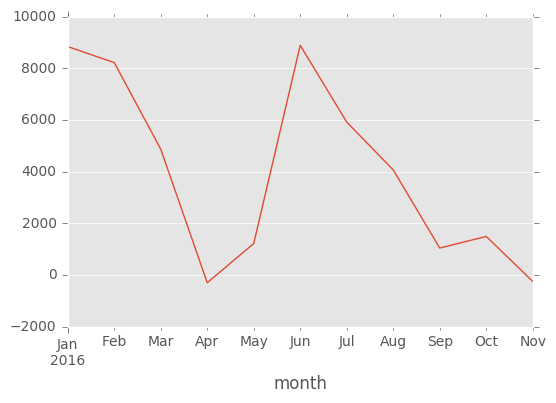

In [42]:
unstacked.loc['Clothing'].plot()

Jsi-li v příkazové řádce, napřed použij `plot()`, a potom se na graf buď podívej, nebo ho ulož:

    # Setup
    import matplotlib.pyplot
    matplotlib.style.use('ggplot')

    # Plot
    unstacked.loc['Clothing'].plot()
    matplotlib.pyplot.show()
    matplotlib.pyplot.savefig('graph.png')

Funkce `show` a `savefig` pracují s „aktuálním” grafem – typicky posledním, který se vykreslil. Pozor na to, že funkce `savefig` aktuální graf zahodí; před dalším `show` nebo `savefig` je potřeba ho vykreslit znovu.

V kombinaci s analytickými funkcemi `Series` a `DataFrame` umožňují grafy získat o datech rychlý přehled.

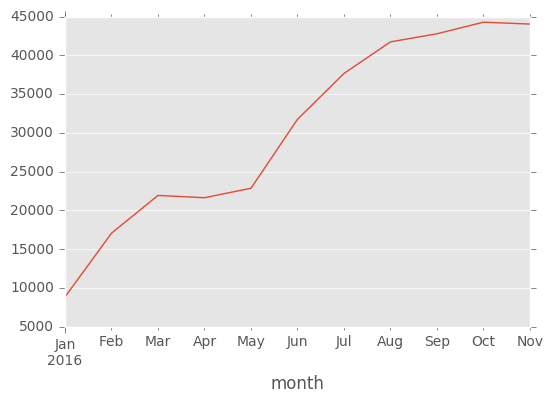

In [43]:
unstacked.loc['Clothing'].cumsum().plot()

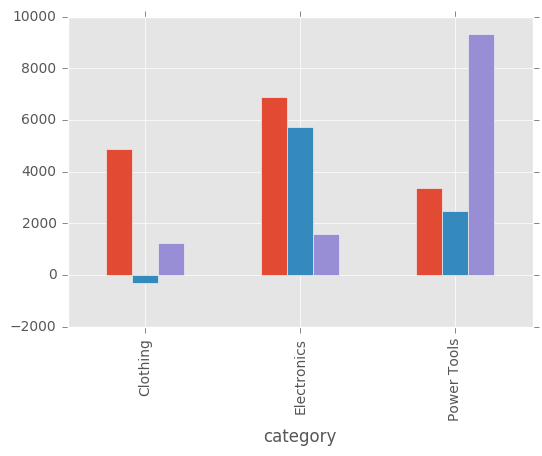

In [44]:
unstacked.loc[:, '2016-03':'2016-05'].plot.bar(legend=False)

Další informace jsou, jak už to bývá, [v dokumentaci](http://pandas.pydata.org/pandas-docs/version/0.19.0/visualization.html).